<a href="https://colab.research.google.com/github/vaish2022/Dashboard/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow matplotlib
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
cifar10 = tf.keras.datasets.cifar10 # Importing cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # Splitting it into training and testing data

for i in (x_train, y_train, x_test, y_test):
  print(i.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[9]


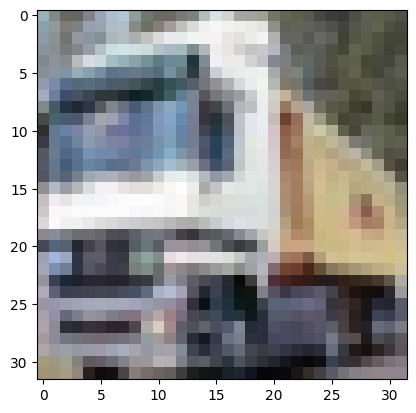

In [5]:
plt.imshow(x_train[1])
print(y_train[1])
plt.show()

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [8]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [10]:
print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


In [11]:
from tensorflow import keras

# Create a sequential model
model = keras.Sequential()

# Convolutional layers
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))  # 10 classes for classification

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(x_train, y_train, batch_size=30, epochs=10, validation_data=(x_test, y_test),shuffle=True)

Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 72s 42ms/step - accuracy: 0.1677 - loss: 2.2150 - val_accuracy: 0.3431 - val_loss: 1.8390
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 67s 40ms/step - accuracy: 0.3755 - loss: 1.7417 - val_accuracy: 0.4465 - val_loss: 1.5326
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 68s 41ms/step - accuracy: 0.4569 - loss: 1.5058 - val_accuracy: 0.4691 - val_loss: 1.4562
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.5035 - loss: 1.3827 - val_accuracy: 0.5171 - val_loss: 1.3495
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 67s 40ms/step - accuracy: 0.5384 - loss: 1.3027 - val_accuracy: 0.5559 - val_loss: 1.2728
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.5650 - loss: 1.2316 - val_accuracy: 0.5730 - val_loss: 1.2034
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 70s 42ms/step - accuracy: 0.5917 - loss: 1.1640 - val_accuracy: 0.5882 - val_loss: 1.1756
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.6083 -

In [26]:
history.history

{'accuracy': [0.23265999555587769,
  0.4018400013446808,
  0.46911999583244324,
  0.5099999904632568,
  0.5439000129699707,
  0.5704200267791748,
  0.5925599932670593,
  0.6115599870681763,
  0.6327800154685974,
  0.6493200063705444],
 'loss': [2.085599184036255,
  1.6649099588394165,
  1.4758007526397705,
  1.3699592351913452,
  1.2866615056991577,
  1.2189863920211792,
  1.1585760116577148,
  1.100775957107544,
  1.0473473072052002,
  1.0001939535140991],
 'val_accuracy': [0.34310001134872437,
  0.4465000033378601,
  0.4690999984741211,
  0.5170999765396118,
  0.555899977684021,
  0.5730000138282776,
  0.5881999731063843,
  0.6085000038146973,
  0.6172000169754028,
  0.6229000091552734],
 'val_loss': [1.8389861583709717,
  1.5325558185577393,
  1.4561518430709839,
  1.3494999408721924,
  1.2727961540222168,
  1.203377604484558,
  1.1755753755569458,
  1.0980595350265503,
  1.0988069772720337,
  1.0644557476043701]}

<Axes: >

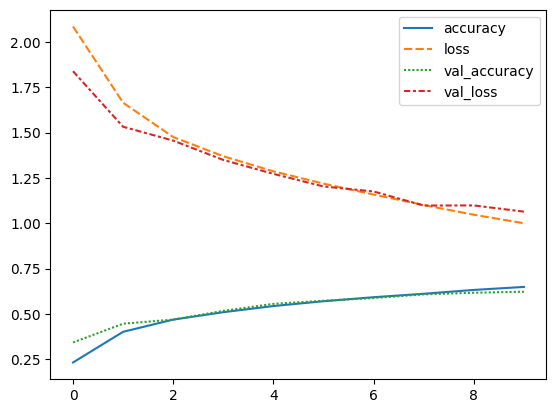

In [13]:
import seaborn as sns
sns.lineplot(model.history.history)

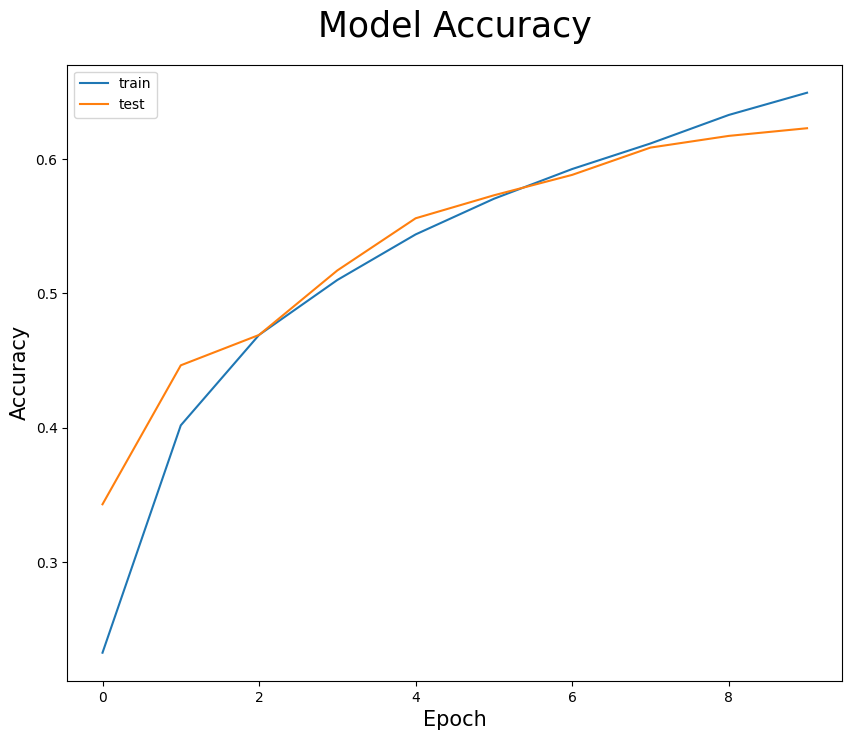

In [27]:
# Plotting the Model Accuracy & Model Loss vs Epochs
plt.figure(figsize=[10,8])

# summarize history for accuracy
# plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
# plt.subplot(1,2,2)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss', size=25, pad=20)
# plt.ylabel('Loss', size=15)
# plt.xlabel('Epoch', size=15)
# plt.legend(['train', 'test'], loc='upper left')
plt.show()


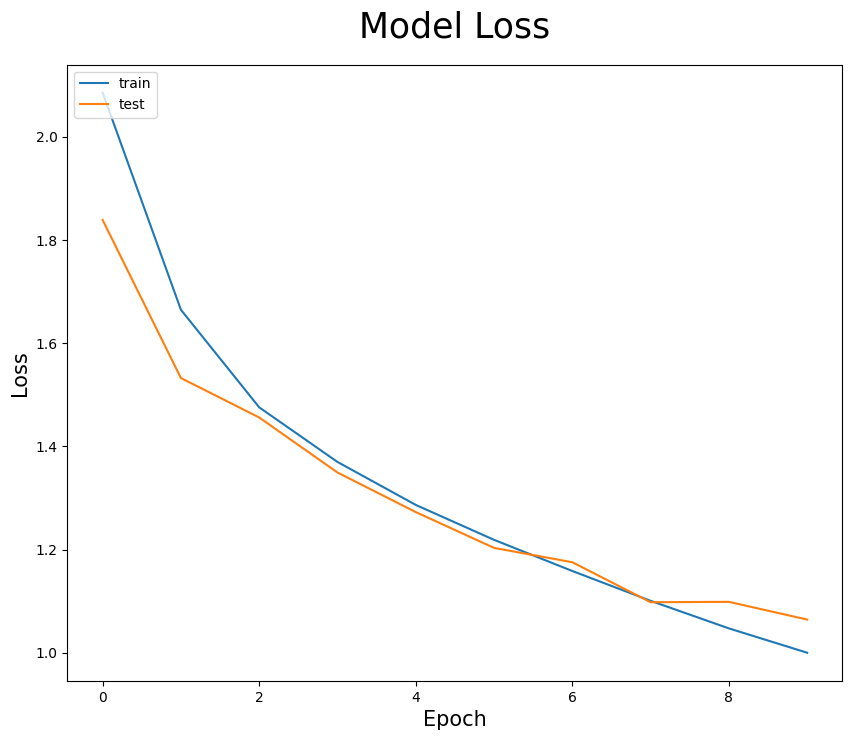

In [30]:
# Plotting the Model Accuracy & Model Loss vs Epochs
plt.figure(figsize=[10,8])
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [16]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Text(0.5, 1.0, 'Predicted value: cat')

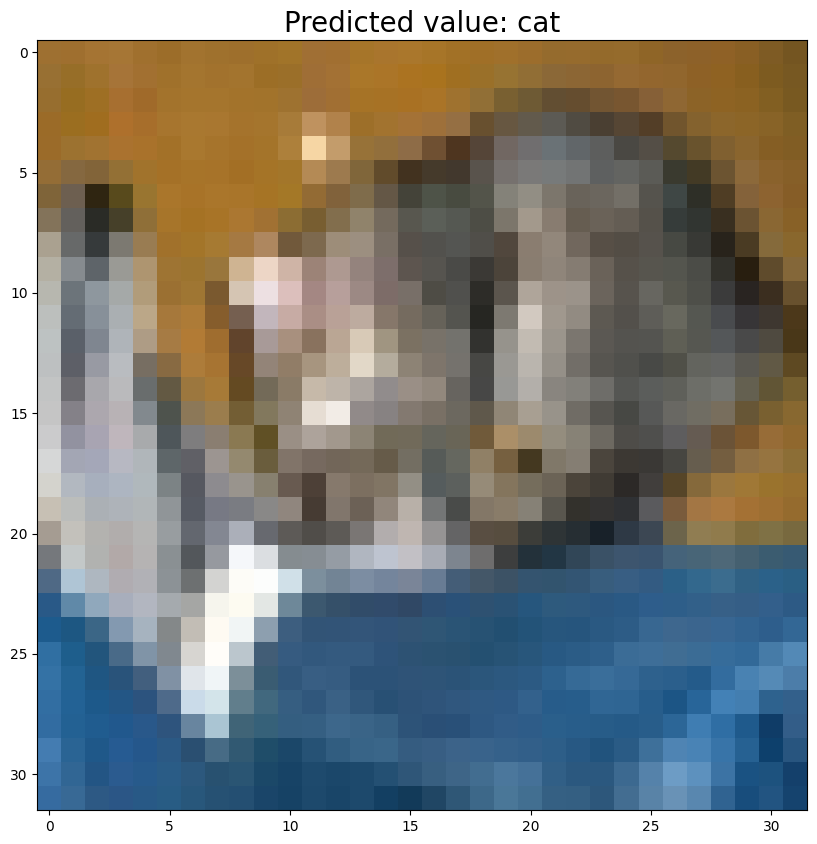

In [35]:
plt.figure(figsize=[10,10])
plt.imshow(x_test[0].reshape(32, 32, -1))
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[0], axis=0)]), size=20)

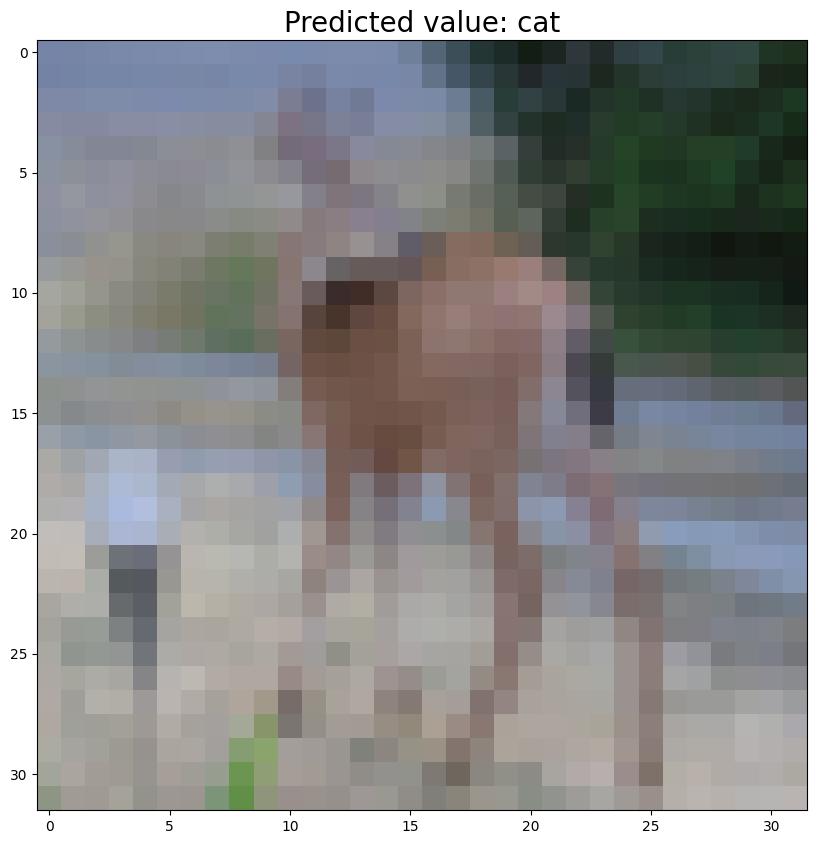

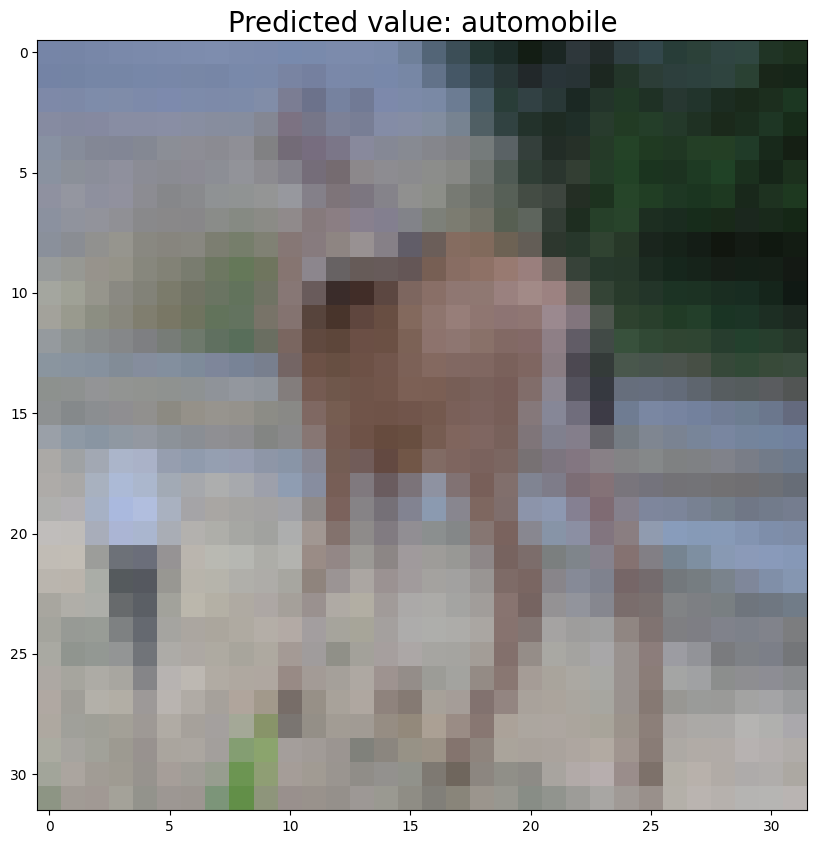

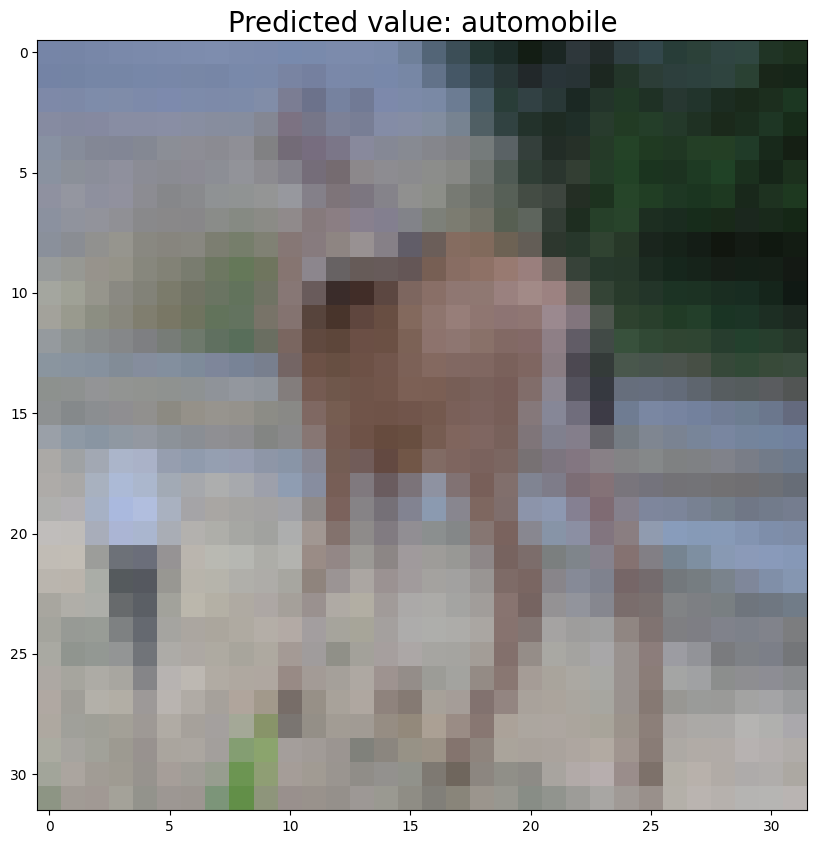

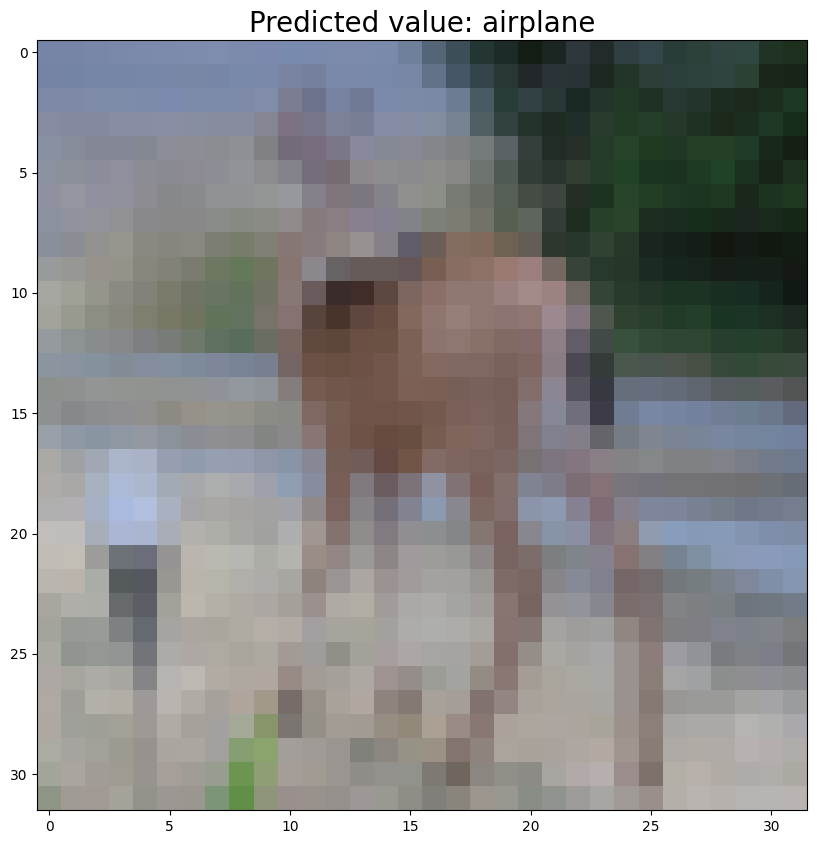

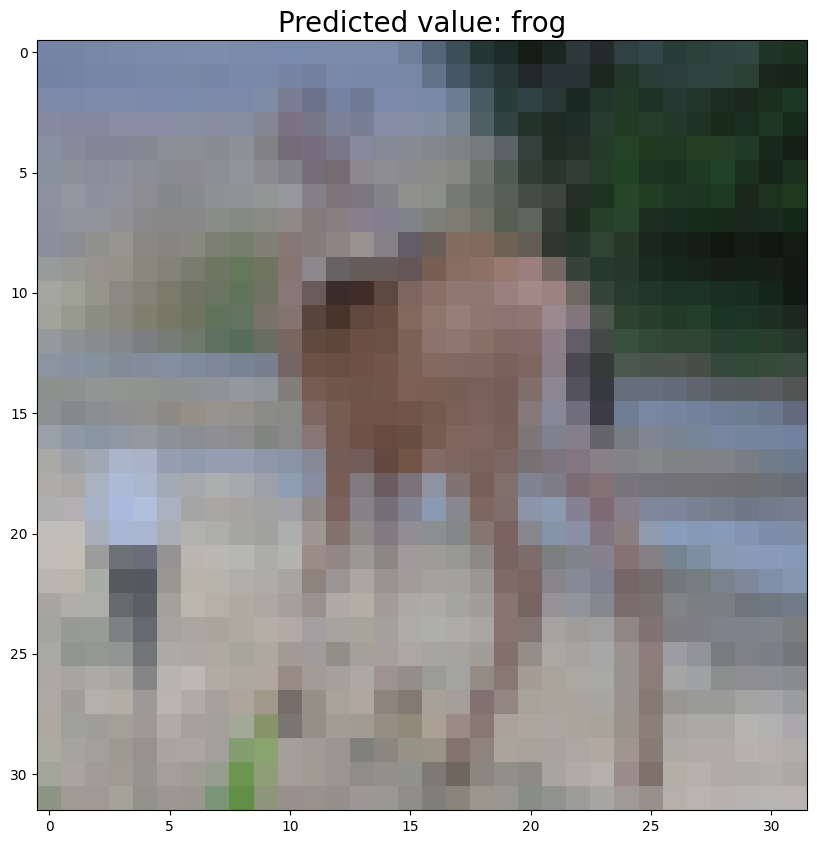

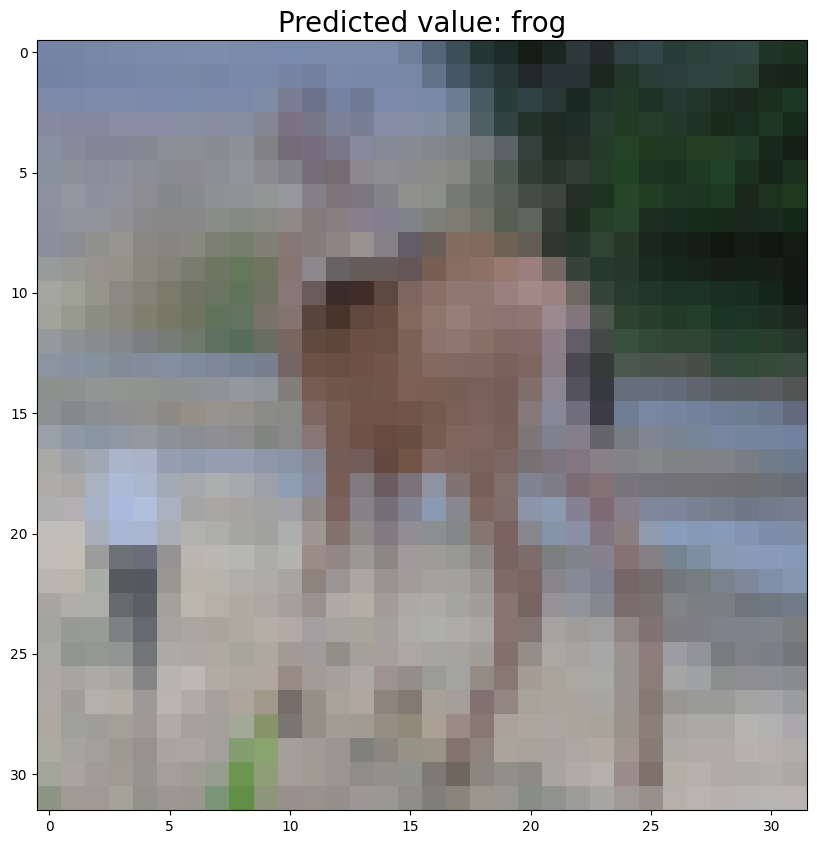

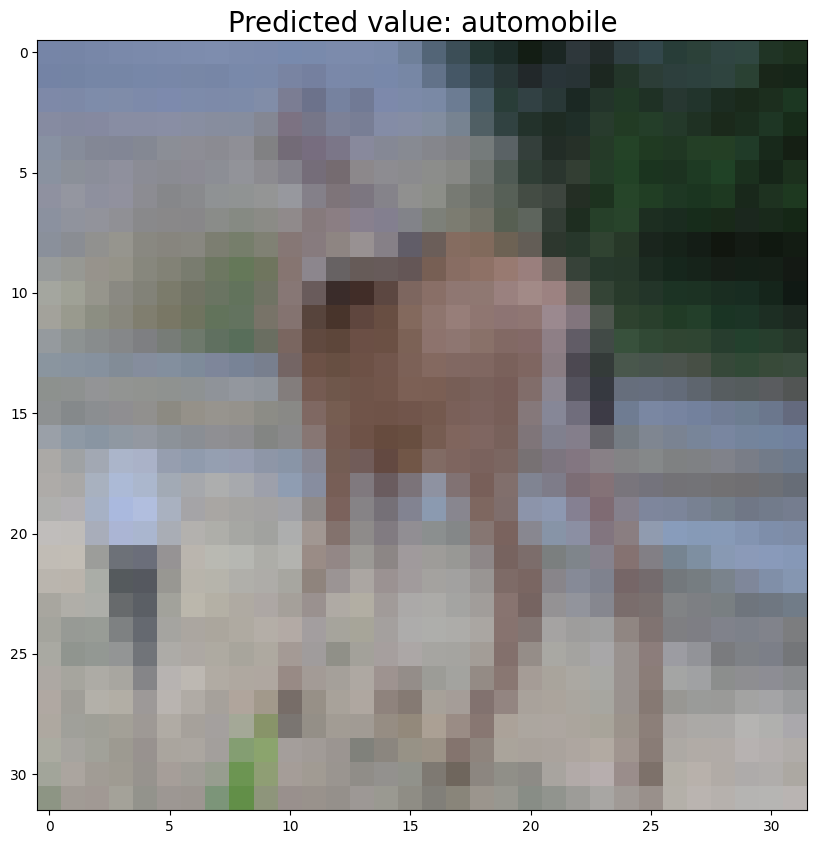

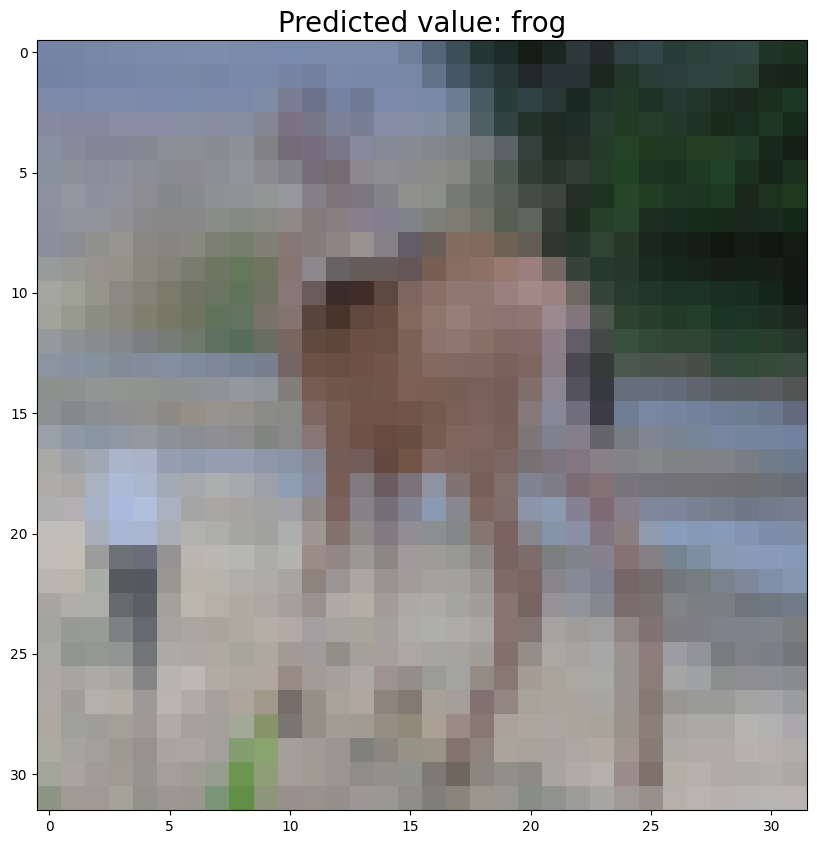

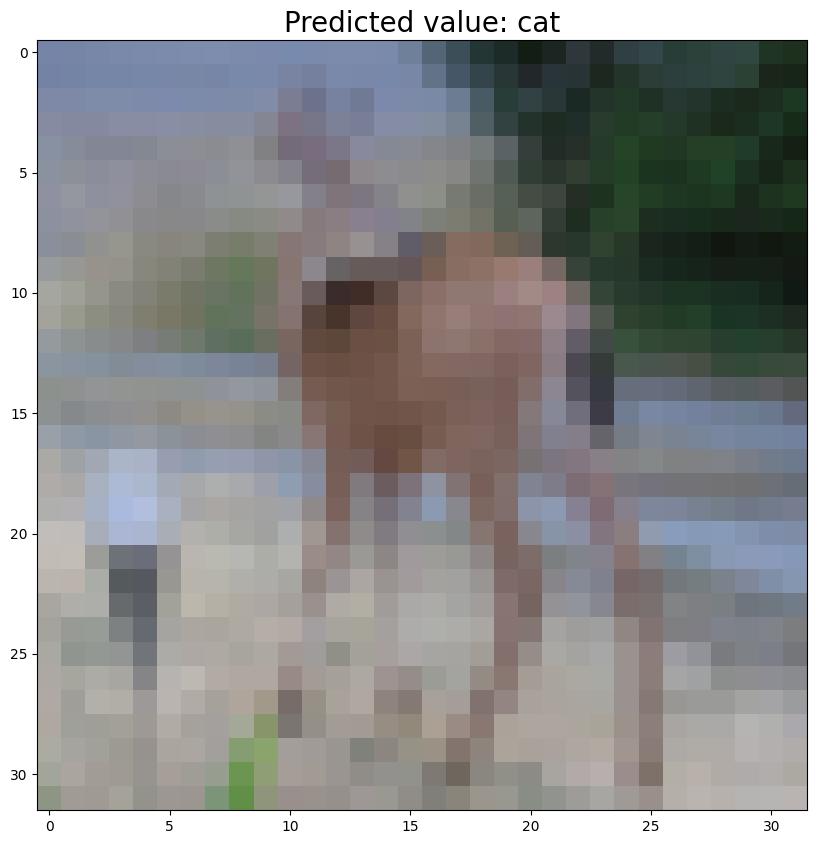

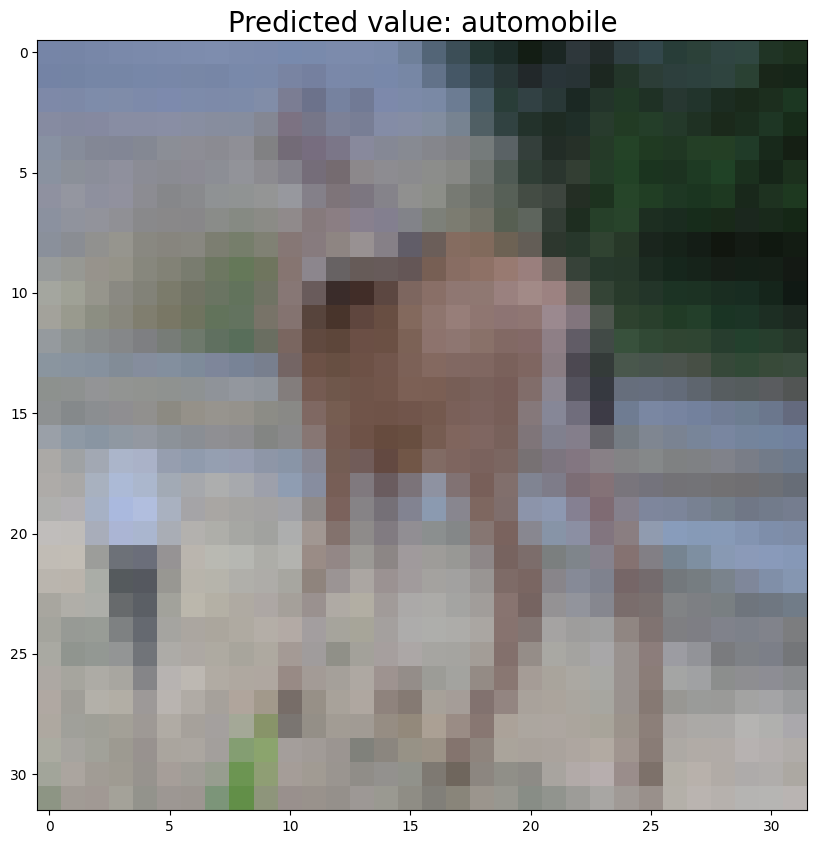

In [36]:
for i in range(10):
  plt.figure(figsize=[10,10])
  plt.imshow(x_test[i].reshape(32, 32, -1))
  plt.title("Predicted value: " + str(class_names[np.argmax(predictions[i], axis=0)]), size=20)